In [1]:
# notebook last tested with abtem version 1.0.0beta32
%matplotlib inline

from abtem import __version__
print('current version:', __version__)

from ase.io import read
from ase.cluster import wulff_construction
from ase import Atoms
import ase.data
import matplotlib.pyplot as plt
from scipy import constants
from scipy import misc
from scipy.ndimage import gaussian_filter
from abtem import *
import numpy as np

/zhome/ab/7/153983/project/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


current version: 1.0.0beta32


{'Au': 0.0680474303682167}


Multislice: 100%|█████████████████████████████████████████████████████████████████████| 172/172 [00:01<00:00, 87.13it/s]


CPU times: user 1.31 s, sys: 996 ms, total: 2.3 s
Wall time: 2.38 s


Multislice: 100%|█████████████████████████████████████████████████████████████████████| 172/172 [00:01<00:00, 94.18it/s]


CPU times: user 1.04 s, sys: 800 ms, total: 1.84 s
Wall time: 1.84 s


Multislice: 100%|█████████████████████████████████████████████████████████████████████| 172/172 [00:01<00:00, 94.37it/s]


CPU times: user 1.02 s, sys: 812 ms, total: 1.83 s
Wall time: 1.83 s


Multislice: 100%|█████████████████████████████████████████████████████████████████████| 172/172 [00:01<00:00, 94.26it/s]


CPU times: user 1.05 s, sys: 784 ms, total: 1.84 s
Wall time: 1.84 s


Multislice: 100%|█████████████████████████████████████████████████████████████████████| 172/172 [00:01<00:00, 94.19it/s]


CPU times: user 1 s, sys: 837 ms, total: 1.84 s
Wall time: 1.84 s


Multislice: 100%|█████████████████████████████████████████████████████████████████████| 172/172 [00:01<00:00, 94.32it/s]


CPU times: user 1.03 s, sys: 804 ms, total: 1.84 s
Wall time: 1.83 s


Multislice: 100%|█████████████████████████████████████████████████████████████████████| 172/172 [00:01<00:00, 94.38it/s]


CPU times: user 1.07 s, sys: 767 ms, total: 1.83 s
Wall time: 1.83 s


Multislice: 100%|█████████████████████████████████████████████████████████████████████| 172/172 [00:01<00:00, 94.12it/s]


CPU times: user 1.07 s, sys: 770 ms, total: 1.84 s
Wall time: 1.84 s


Multislice: 100%|█████████████████████████████████████████████████████████████████████| 172/172 [00:01<00:00, 94.18it/s]


CPU times: user 1.07 s, sys: 767 ms, total: 1.84 s
Wall time: 1.84 s


Multislice: 100%|█████████████████████████████████████████████████████████████████████| 172/172 [00:01<00:00, 94.13it/s]


CPU times: user 1.02 s, sys: 820 ms, total: 1.84 s
Wall time: 1.84 s
{'Au': 0.0680474303682167}


Multislice: 100%|████████████████████████████████████████████████████████████████████| 164/164 [00:01<00:00, 117.41it/s]


CPU times: user 780 ms, sys: 630 ms, total: 1.41 s
Wall time: 1.41 s


Multislice: 100%|████████████████████████████████████████████████████████████████████| 164/164 [00:01<00:00, 120.69it/s]


CPU times: user 752 ms, sys: 618 ms, total: 1.37 s
Wall time: 1.37 s


Multislice: 100%|████████████████████████████████████████████████████████████████████| 164/164 [00:01<00:00, 117.76it/s]


CPU times: user 733 ms, sys: 672 ms, total: 1.4 s
Wall time: 1.4 s


Multislice: 100%|████████████████████████████████████████████████████████████████████| 164/164 [00:01<00:00, 118.60it/s]


CPU times: user 757 ms, sys: 637 ms, total: 1.39 s
Wall time: 1.39 s


Multislice: 100%|████████████████████████████████████████████████████████████████████| 164/164 [00:01<00:00, 118.40it/s]


CPU times: user 725 ms, sys: 671 ms, total: 1.4 s
Wall time: 1.4 s


Multislice: 100%|████████████████████████████████████████████████████████████████████| 164/164 [00:01<00:00, 117.98it/s]


CPU times: user 742 ms, sys: 660 ms, total: 1.4 s
Wall time: 1.4 s


Multislice: 100%|████████████████████████████████████████████████████████████████████| 164/164 [00:01<00:00, 117.74it/s]


CPU times: user 750 ms, sys: 654 ms, total: 1.4 s
Wall time: 1.4 s


Multislice: 100%|████████████████████████████████████████████████████████████████████| 164/164 [00:01<00:00, 118.31it/s]


CPU times: user 752 ms, sys: 645 ms, total: 1.4 s
Wall time: 1.4 s


Multislice: 100%|████████████████████████████████████████████████████████████████████| 164/164 [00:01<00:00, 117.37it/s]


CPU times: user 732 ms, sys: 676 ms, total: 1.41 s
Wall time: 1.41 s


Multislice: 100%|████████████████████████████████████████████████████████████████████| 164/164 [00:01<00:00, 117.06it/s]


CPU times: user 753 ms, sys: 660 ms, total: 1.41 s
Wall time: 1.41 s


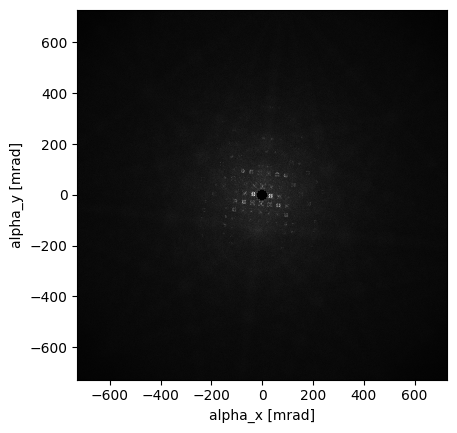

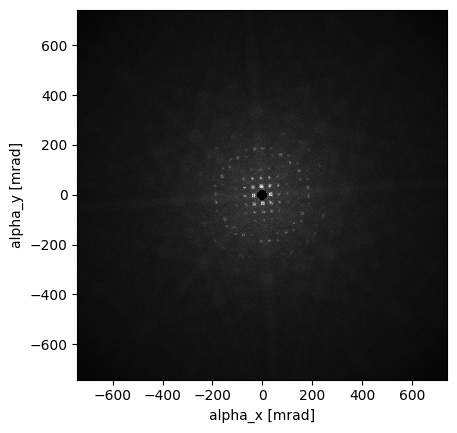

In [2]:
surfaces = [(1, 0, 0), (1, 1, 0), (1, 1, 1)] # Nanoparticle facets

esurf = [1.0, 1.1, 0.9] # Relative surface energies

size = 16000 # Target number of atoms

repetitions = 2

randX = np.random.binomial(180, 0.5, repetitions)
randY = np.random.binomial(180, 0.5, repetitions)
randZ = np.random.binomial(180, 0.5, repetitions)
iteration = 0

for j in randX:

    atoms = Atoms(wulff_construction('Au', surfaces, esurf, size, 'fcc', rounding='above'))

    atoms.rotate(randX[iteration], 'x', center='cop')
    atoms.rotate(randY[iteration], 'y', center='cop')
    atoms.rotate(randZ[iteration], 'z', center='cop')

    atoms.center(vacuum=5.)

    atoms.center(vacuum=2., axis=2)
    
    gridpoints = int(max(atoms.cell[0,0], atoms.cell[1,1]) / 0.05)
    
    gridpoints = 4096
    
    angle = 2*4.5e-3
    
    defocus = 40/np.sin(angle)

    mass = ase.data.atomic_masses[ase.data.atomic_numbers['Au']]
    TD = 165  # Kittel
    T = 300
    U_squared = (3 * constants.hbar**2 / (2 *  mass * ase.units._amu * constants.k * TD)
                 * (1/4 + T / TD))
    sigmas = {'Au': np.sqrt(U_squared) * 1e10} # standard deviations of thermal vibrations
    print(sigmas)
    num_configs = 10 # number of frozen phonon configurations

    frozen_phonons = FrozenPhonons(atoms, num_configs=num_configs, sigmas=sigmas)

    for i,config in enumerate(frozen_phonons):

        potential = Potential(config, 
                              gpts=gridpoints, 
                              slice_thickness=0.5, 
                              device='gpu',
                              #storage='cpu',
                              precalculate=False,
                              parametrization='kirkland', 
                              projection='infinite')

        probe = Probe(sampling=potential.sampling,
            device='gpu',
            semiangle_cutoff=angle*1000,
            extent=potential.extent,
            defocus=defocus,
            energy=30e3 # acceleration voltage in eVhttp://localhost:8080/notebooks/Kikuchi.ipynb#
        )
        positions = (0, 0)

        %time exit_wave = probe.multislice(positions, potential)

        cbed_diffraction_pattern = exit_wave.diffraction_pattern(block_zeroth_order=20)

        if (i==0):
            summedImage = cbed_diffraction_pattern.array
        else:
            summedImage += cbed_diffraction_pattern.array


    cbed_diffraction_pattern.array[:] = summedImage/num_configs
    exit_wave.array.shape
    
    ax, im = cbed_diffraction_pattern.show(cmap='gray', power = 0.25)
    
    
    plt.savefig(''+ str(iteration) + '_' + str(randX[iteration]) + '_' + 
                str(randY[iteration]) + '_' + str(randZ[iteration]) + '.png')
    iteration += 1